# Dictionaries 2 - Combining Dictionaries and Lists (nested data structures)

* Download ALL files from Canvas for today's lecture
* P6 due today
* Quiz 5 Released tonight
* Read
  * Downey Ch 11 ("Dictionaries and Lists" and "Global Variables" to end)
* [Exam 2 Conflict Form](https://docs.google.com/forms/d/e/1FAIpQLSegJSzTsDHEnygijU3-HQvZDUbTCkHFPKccDkqMt1dGzC67_w/viewform)
* [Regrade Request](https://piazza.com/class/ld8bqui1lgeas/post/105)
* It is almost always faster to 
  * Post on Piazza
  * Go to [office hours](https://sites.google.com/wisc.edu/cs220-oh-sp23/home?pli=1&authuser=2) 
* [Thank You](https://docs.google.com/forms/d/e/1FAIpQLSe0Zi6JFbxPIEVr7u1DJykuel-qSi7U0sBp2iR0gi6R_CArgw/viewform)
* [Complain Here](https://docs.google.com/forms/d/e/1FAIpQLSdRQstcW2PrXSQB1isbI6X91UlpoLEu_F-Jq5ENkBtZ4QfHgQ/viewform)
  * Regrade requests from last week
  * Monday 
    - Goal is 24 hours
    - It is almost always faster to 
      - Post on Piazza
      - Go to [office hours](https://sites.google.com/wisc.edu/cs220-oh-sp23/home?pli=1&authuser=2)
* [Thank You](https://docs.google.com/forms/d/e/1FAIpQLSe0Zi6JFbxPIEVr7u1DJykuel-qSi7U0sBp2iR0gi6R_CArgw/viewform)
* [Complain Here](https://docs.google.com/forms/d/e/1FAIpQLSdRQstcW2PrXSQB1isbI6X91UlpoLEu_F-Jq5ENkBtZ4QfHgQ/viewform)

# Data Structure Methods
* [String Methods](https://www.w3schools.com/python/python_strings_methods.asp)
* [List Methods](https://www.w3schools.com/python/python_ref_list.asp)
* [Set Methods](https://www.w3schools.com/python/python_ref_set.asp)
* [Dict Methods](https://www.w3schools.com/python/python_ref_dictionary.asp)

In [ ]:
import csv

### Warmup 1: Answer these questions about dictionaries

In [ ]:
# Keys can be what type? :     Any type that is ________________
# Values can be what type? :   
# Indexing? .... yes/no
# Slicing? ..... yes/no 
# Mutable?......yes/no

In [ ]:
# inspired by https://automatetheboringstuff.com/2e/chapter16/
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData

survey_data = process_csv('cs220_survey_data.csv')

### Warmup 2a: Split csv data into header and data

In [ ]:
cs220_header = survey_data
cs220_data = survey_data
cs220_header

### Warmup 2b: Display the first 3 data rows

In [ ]:
def cell(data, header, row_idx, col_name):
    """
    Returns the data value (cell) corresponding to the row index and 
    the column name of a CSV file.
    """
    col_idx = header.index(col_name) 
    val = data[row_idx][col_idx]  
    
    # handle missing values, by returning None
    if val == '':
        return None
    
    # handle type conversions
    if col_name in ["Age",]:
        return int(val)
    elif col_name in ['Latitude', 'Longitude']:
        return float(val)
    
    return val

### Warmup 3: Make a dictionary of frequency of `Major`

- Initialize empty `dict` into a variable called `major_freq`
- Iterate over the data:
    - Extract required column's data
    - Make sure to handle missing data
    - Check if current value of the column is a key in your `dict`:
        - yes, update the count
        - no, insert new key-value pair

In [ ]:
# TODO: iterate over each student's data from cs220_data
# TODO: extract "Major" column's value 
# TODO: check if current student's major already a key in major_freq
#            - if yes, increase the corresponding value by 1
#            - if no, insert a new key-value pair



### What is the most common `Major` among CS220 / CS319 students?

In [ ]:
most_used_key = None  
max_value = None

for major in major_freq:
    if max_value == None or major_freq[major] > max_value:
        max_value = major_freq[major]
        most_used_key = major

print("The major \"{}\" appeared {} times.".format(str(most_used_key), max_value))

### Learning Objectives:
 - Handle key errors with get and pop using default values
 - Understand the idea of nesting data structures
 - Use a dictionary of lists to put rows of data into "buckets"
 - Use a list of dictionaries to represent a table of data.
 - Create a dictionary of dictionaries

### Default values with `get` and `pop` methods.

In [4]:
suffix = {1: "st", 2: 'nd', 3: "rd"}
suffix.get(1)

# TODO: what happens when you try to get a key that is not there? Try it.

# TODO: what happens whey you try to pop a key that is not there? Try it.


None


`get` and `pop` methods accept a second argument, which will be the default value if the first argument (key) does not exist.

Syntax:
- `some_dict.get(some_key, default_value)`
- `some_dict.pop(some_key, default_value)`

In [ ]:
# get(key, default value) 
print(suffix.get(3, 'th'))
print(suffix.get(5, 'th')) #default value, but does not add the key-value pair to the dict

# pop(key, default value)
print(suffix.pop(7, 'th')) # no key-value pair to remove
print(suffix.pop(2, 'th'))
print(suffix)

### What are nested data structures?
A data structure containing another data structure as item is called as nest data structure.

## Nesting part 1: Bucketizing/Binning

<div>
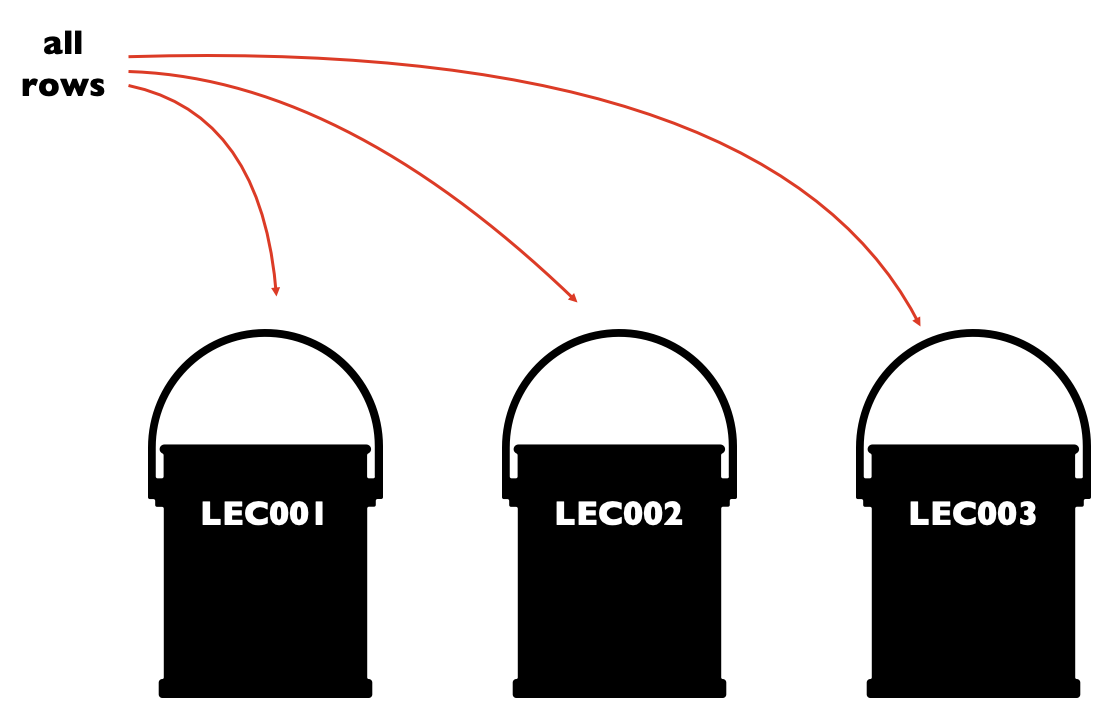
</div>

<div>
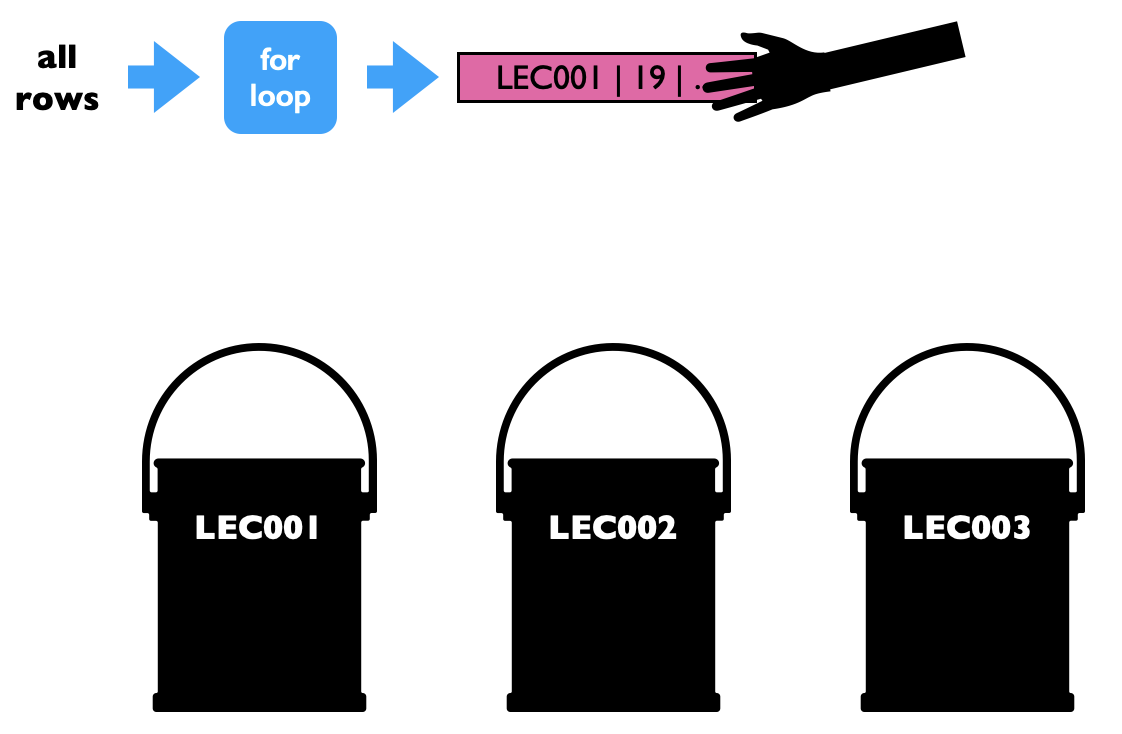
</div>

<div>
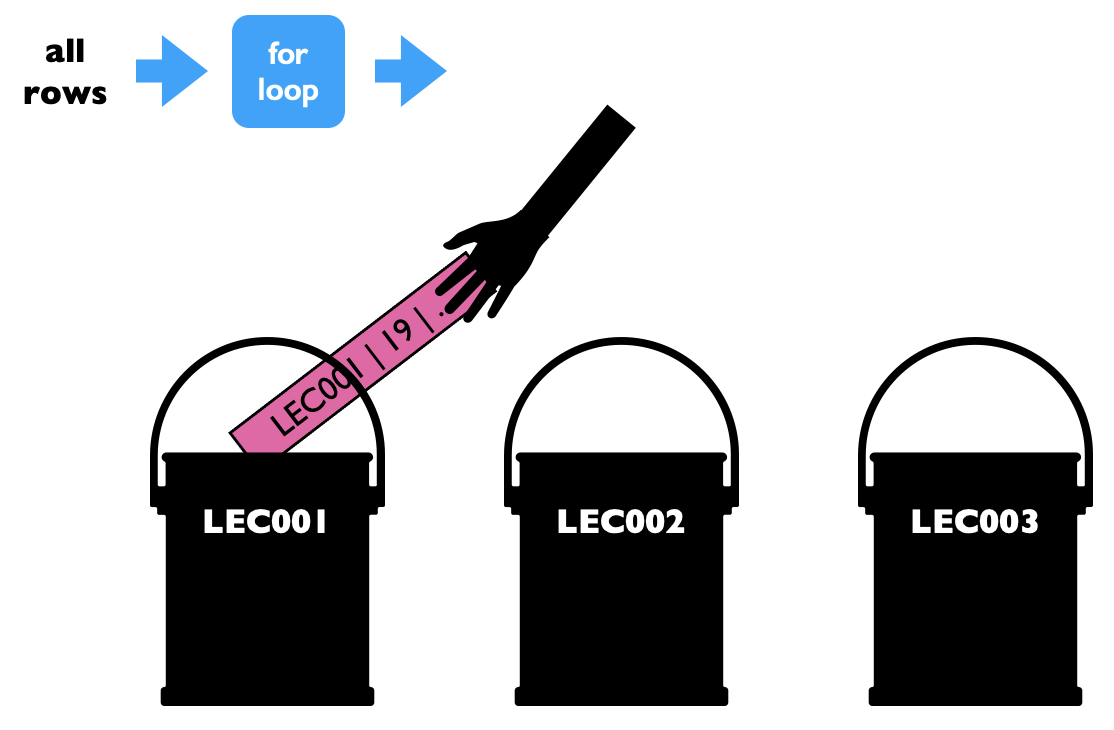
</div>

Bucketizing/Binning process objective: build dict of list of lists data structure
- Initialize an empty `dict`
- Iterate over every row in your dataset
    - Retrieve value of the column based on which you want to bucketize
    - Check if bucketizing column is already a key in your `dict`:
        - if no, insert a new key-value pair:
            - key: unique value of bucktizing column
            - value: initialize a new list, append current row as an item into the list, thereby creating a list of list data structure
        - if yes, append current row to the list of list data structure (value of the key).

After this process, each row ends up in a bin, based on the value of the bucketize column.
Number of bins = number of unique values in the bucketize column

Why bucketize data?
- A way to organize our data, without losing information in the process

In [ ]:
# Let's take another look at our 'cs220_survey_data.csv'
cs220_header

In [ ]:
# Let's bucketize the data
buckets = dict() # Key: unique bucketize column value; Value: list of lists (rows having that unique column value)



Let's convert the above code into a function called 'bucketize'.

In [ ]:
def col_avg(data, header, col_name, min_bound, max_bound):
    """
    data: list of list data structure representing rows
    col_name: name of the column for which we want to compute average
    min_bound, max_bound: bounds for the data (data cleaning)
    Returns average of that column.
    """
    pass
    
min_age = 0
max_age = 125
col_avg(cs220_data, cs220_header, "Age", min_age, max_age)

### Average per bucket

In [ ]:
def avg_per_bucket(buckets, avg_col_name, min_bound, max_bound):
    """
    Computes and returns column average per bucket
    """
    pass

### What is the average student age per lecture?

### What is the average student age in each major?

## Nesting part 2: Tables
### Use a list of dictionaries to represent a table of data.

<div>
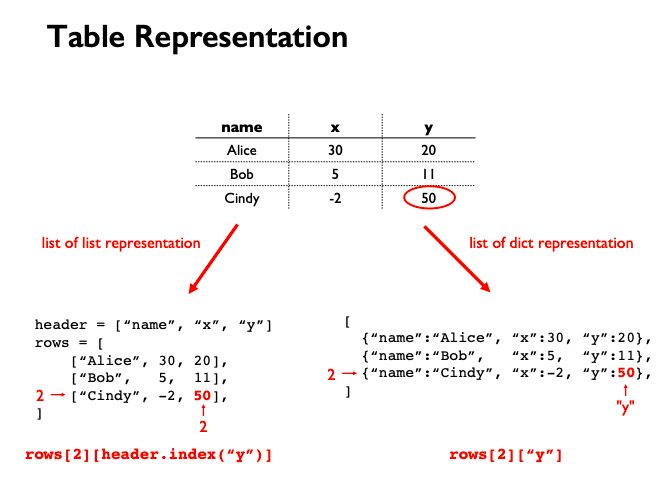
</div>

Steps (build a list of dictionaries)
- Start with an empty list
- Each row of data is one dictionary
    - keys are the column names
    - values are the data in each cell

Why put data in table form?
- It seems redundant, but is used often in Web apps for storing info.
- Its a little easier to access subsets of the data without worrying about the header index method.

In [ ]:
# Let's put the student survey data into a list of dictionaries
cs220_header

In [ ]:
def transform(header, data):
    """
    Transform data into a list of dictionaries
    """
    
transformed_data = transform(cs220_header, cs220_data)

### What `Lecture` is the first student part of?

In [ ]:
print()

### What is the `Major` of the last student?

In [ ]:
print()

## Nesting part 3: Dictionary of Dictionaries

https://www.w3schools.com/python/python_dictionaries_nested.asp

In [ ]:
# dict of dicts example:

nested_english_dict = {
    "shenanigans": {
        "definition": "silly or high-spirited behavior; mischief.",
        "usage": "widespread financial shenanigans had ruined the fortunes of many",
        "fun_to_say": 7 # on a scale of 1-10
    },
    "bamboozle": {
        "definition": "fool or cheat (someone).",
        "usage": "Tom Sawyer bamboozled the neighborhood boys into painting for him",
        "fun_to_say": 8 # on a scale of 1-10
    },
    "gubbins": {
        "definition": "(objects) of little to no value.",
        "usage": "I cleared all the gubbins off my desk before I started working",
        "fun_to_say": 10 # on a scale of 1-10
    },
    "malarkey": {
        "definition": "meaningless talk; nonsense.",
        "usage": "don't give me that malarkey",
        "fun_to_say": 5 # on a scale of 1-10
    },
    "gnarly": {
        "definition": "gnarled.",
        "usage": "twisted trees and gnarly roots",
        "fun_to_say": 2 # on a scale of 1-10
    }
}

# TODO: pick a word and add an inner dict

### How can we use "bamboozle"?

### Create a list of words with fun_to_say score greater than 7.